In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
SincP = 5.0
dist_per_samp = 0.1
pitch = 0.1
src = (0, 0)

# Nmics = 64
# Nsamp = 200
C = 2.0
# obstacle = (3, -1)

time_per_samp = dist_per_samp / C

def wsrc(t):
    return np.sinc(SincP*t)

def dist(src, pt, mic):
    d1 = math.dist(src, pt)             # distance from src to pt
    d2 = math.dist(pt, mic)             # distance from pt to mic
    return d1 + d2


In [15]:
matrix = np.loadtxt('rx3.txt')
print(matrix)

Nsamp = len(matrix[0])
Nmics = len(matrix)
Nsamp, Nmics

[[-0.040501 -0.03022  -0.007779 ...  0.01284   0.017685  0.015723]
 [-0.033295 -0.013816  0.011751 ...  0.016796  0.016613  0.010106]
 [-0.019023  0.004968  0.027881 ...  0.016894  0.011977  0.002573]
 ...
 [-0.015542 -0.003418  0.010536 ...  0.005621  0.009016  0.008892]
 [-0.021888 -0.012888  0.001549 ...  0.003526  0.0084    0.009973]
 [-0.02461  -0.021041 -0.009044 ...  0.000542  0.006767  0.010301]]


(200, 64)

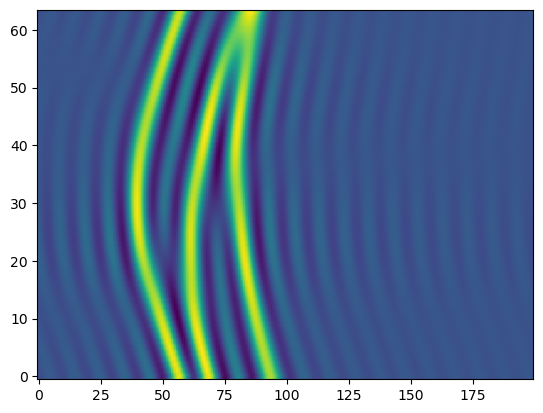

In [16]:
plt.figure()
plt.imshow(matrix, aspect='auto', cmap='viridis', origin='lower')

In [ ]:
Y = np.linspace(-Nmics * pitch / 2, Nmics * pitch / 2, Nmics)
X = np.linspace(0, Nsamp * dist_per_samp / 2, Nsamp)        # Nsamp * dist_per_samp = t[-1] * C
# The "/ 2" in X is just to cutoff the remaining half of the plot which isn't needed


0.0 10.0 200
-3.2 3.2 64


Text(0, 0.5, 'Y-coordinate')

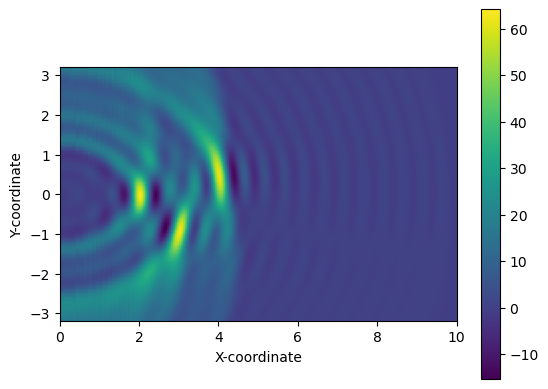

In [ ]:
plt.figure()
heatmap_data = np.zeros((Nsamp, Nmics))

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        for k, mic in enumerate(matrix):
            time = dist(src, (x, y), (0, Y[k])) / C
            idx = math.floor(time/time_per_samp)
            heatmap_data[i, j] += mic[min(idx, len(mic)-1)]

plt.imshow( heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]])
plt.colorbar()
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")